In [63]:
import os
import json
import math

import matplotlib.pyplot as plt
import numpy as np

from collections import Counter, defaultdict

In [64]:
path = 'save_results_completion_permutations_scrambled_two_easiest_scrambled.json'

In [65]:
res = json.load(open(path, 'r'))

In [66]:
len(res['permutations'])

998

In [67]:
list_outputs = []
permutations = []
justifications = []
for (i1, lo), (i2, p) in zip(res['list_outputs'], res['permutations']):
    if len(lo) == 2:
        list_outputs.append((i1, lo))
        permutations.append((i2, p))
len(list_outputs)

998

In [68]:
def apply_permutation(l, perm):
    return [l[i] for i in perm]

In [69]:
res['list_outputs'] = list_outputs
res['permutations'] = permutations

In [70]:
len(res['permutations'])

998

In [71]:
res['list_outputs']

[(0, [1, 0]),
 (1, [0, 1]),
 (2, [1, 0]),
 (3, [1, 0]),
 (4, [1, 0]),
 (5, [0, 1]),
 (6, [1, 0]),
 (7, [0, 1]),
 (8, [1, 0]),
 (9, [1, 0]),
 (10, [0, 1]),
 (11, [1, 0]),
 (12, [1, 0]),
 (13, [1, 0]),
 (14, [1, 0]),
 (15, [0, 1]),
 (16, [0, 1]),
 (17, [1, 0]),
 (18, [0, 1]),
 (19, [0, 1]),
 (20, [1, 0]),
 (21, [0, 1]),
 (22, [0, 1]),
 (23, [0, 1]),
 (24, [1, 0]),
 (25, [0, 1]),
 (26, [1, 0]),
 (27, [0, 1]),
 (28, [1, 0]),
 (29, [0, 1]),
 (30, [0, 1]),
 (31, [0, 1]),
 (32, [1, 0]),
 (33, [1, 0]),
 (34, [1, 0]),
 (35, [0, 1]),
 (36, [0, 1]),
 (37, [1, 0]),
 (38, [1, 0]),
 (39, [1, 0]),
 (40, [0, 1]),
 (41, [1, 0]),
 (42, [1, 0]),
 (43, [1, 0]),
 (44, [1, 0]),
 (45, [1, 0]),
 (46, [1, 0]),
 (47, [0, 1]),
 (48, [0, 1]),
 (49, [1, 0]),
 (50, [0, 1]),
 (51, [1, 0]),
 (52, [0, 1]),
 (53, [0, 1]),
 (54, [0, 1]),
 (55, [1, 0]),
 (56, [1, 0]),
 (57, [1, 0]),
 (58, [1, 0]),
 (59, [0, 1]),
 (60, [0, 1]),
 (61, [0, 1]),
 (62, [0, 1]),
 (63, [1, 0]),
 (64, [0, 1]),
 (65, [0, 1]),
 (66, [1, 0]),
 (67,

In [72]:
res['puz_ids']

[[5, 1],
 [7, 3],
 [2, 6],
 [7, 0],
 [2, 0],
 [0, 7],
 [7, 4],
 [2, 4],
 [0, 1],
 [5, 2],
 [0, 2],
 [4, 1],
 [0, 7],
 [2, 1],
 [6, 7],
 [2, 4],
 [6, 7],
 [6, 2],
 [1, 0],
 [4, 5],
 [0, 7],
 [1, 4],
 [7, 1],
 [5, 3],
 [0, 2],
 [2, 1],
 [6, 7],
 [3, 7],
 [1, 2],
 [2, 1],
 [3, 0],
 [5, 2],
 [6, 2],
 [0, 3],
 [7, 2],
 [5, 4],
 [3, 0],
 [4, 2],
 [3, 6],
 [0, 7],
 [7, 1],
 [0, 5],
 [7, 6],
 [5, 3],
 [0, 7],
 [6, 7],
 [1, 5],
 [1, 6],
 [2, 7],
 [4, 1],
 [4, 1],
 [1, 5],
 [5, 6],
 [6, 5],
 [5, 4],
 [1, 0],
 [2, 4],
 [6, 0],
 [1, 6],
 [7, 3],
 [7, 5],
 [4, 0],
 [5, 7],
 [5, 0],
 [6, 1],
 [6, 5],
 [0, 7],
 [5, 2],
 [6, 4],
 [3, 5],
 [3, 7],
 [1, 0],
 [1, 7],
 [4, 3],
 [4, 5],
 [3, 7],
 [2, 1],
 [2, 4],
 [7, 3],
 [3, 2],
 [5, 1],
 [7, 5],
 [5, 2],
 [1, 5],
 [2, 6],
 [4, 2],
 [0, 3],
 [3, 5],
 [1, 2],
 [5, 2],
 [1, 4],
 [3, 2],
 [2, 4],
 [3, 5],
 [1, 7],
 [0, 4],
 [7, 2],
 [4, 1],
 [7, 0],
 [0, 5],
 [1, 4],
 [2, 0],
 [7, 1],
 [1, 2],
 [4, 5],
 [0, 7],
 [7, 0],
 [1, 3],
 [5, 1],
 [0, 2],
 [2, 4],
 

In [73]:
# for the pref version
puzzle_mapping = {
    0: 1,
    1: 1,
    2: 0,
    3: 0,
    4: 2,
    5: 2, 
    6: 3,
    7: 3
}

In [74]:
ptype_names = {
    0: 'Bad',
    1: 'Hard',
    2: 'Trivial',
    3: 'Appropriate',
}

In [75]:
len(res['unique'])

2

In [76]:
print(f'{len(res["unique"]) / math.factorial(2) * 100:.2f}% of permutations are filled.')

100.00% of permutations are filled.


In [77]:
perms = [p for _, p in res['list_outputs']]

In [78]:
i = 4

In [79]:
# test the unscrambling thingy
perm0 = perms[i]
pid0 = res['puz_ids'][i]

In [80]:
# to get the indices of the puzzles we need to
# apply the preference permutation to the random permutation
# then apply this permutation to the puzzle ids

prefs_permuted = apply_permutation(res['permutations'][i][1], res['list_outputs'][i][1])
actual_prefs = apply_permutation(res['puz_ids'][i], prefs_permuted)
actual_prefs

[2, 0]

In [81]:
print(res['justifications'][i][1])

To determine which puzzle is easiest, we need to consider the complexity of the solution function `g` and the requirements of the problem description function `f`. 

For the KWaa puzzle, the solution function `g` uses recursion to generate a list of numbers that satisfy certain conditions. It also uses a helper function `gcd` to calculate the greatest common divisor. The problem description function `f` checks if the generated list of numbers satisfies the conditions specified in the problem. 

For the eEkm puzzle, the solution function `g` simply checks if the input list is sorted in ascending order. The problem description function `f` checks if the input list is sorted correctly. 

Based on the complexity of the solution functions and the requirements of the problem description functions, it can be concluded that the eEkm puzzle is easier than the KWaa puzzle. The eEkm puzzle has a simpler solution function and a simpler problem description function. 

Answer: 


In [82]:
res['puz_ids'][i]

[2, 0]

In [83]:
puz_ids_in_order = [res['puz_ids'][i][j] for j in perms[i]]
puz_ids_in_order

[0, 2]

In [84]:
res['list_outputs'][1]

(1, [0, 1])

In [85]:
# [1, 6, 3, 2, 0]?
print(res['justifications'][i][1])

To determine which puzzle is easiest, we need to consider the complexity of the solution function `g` and the requirements of the problem description function `f`. 

For the KWaa puzzle, the solution function `g` uses recursion to generate a list of numbers that satisfy certain conditions. It also uses a helper function `gcd` to calculate the greatest common divisor. The problem description function `f` checks if the generated list of numbers satisfies the conditions specified in the problem. 

For the eEkm puzzle, the solution function `g` simply checks if the input list is sorted in ascending order. The problem description function `f` checks if the input list is sorted correctly. 

Based on the complexity of the solution functions and the requirements of the problem description functions, it can be concluded that the eEkm puzzle is easier than the KWaa puzzle. The eEkm puzzle has a simpler solution function and a simpler problem description function. 

Answer: 


In [86]:
def plot_permutations_pref(results, perms, puz_ids, n_positions=2, indices=4, title=None):
    if title is None:
        title = 'Proportion of each index at each position in permutations'
    # Initialize a 2D list to hold frequency counts for each index at each position
    # 5 positions, with 5 possible indices at each position
    freq_counts = np.zeros((n_positions, indices))
    puz_types = []
    for perm, pid, result in zip(perms, puz_ids, results):

        prefs_permuted = apply_permutation(perm, result)
        actual_prefs = apply_permutation(pid, prefs_permuted)
        puzzle_type = [puzzle_mapping[p] for p in actual_prefs]
        puz_types.append(puzzle_type)

    # Iterate over each permutation
    for perm in puz_types:
        for pos, index in enumerate(perm):
            # Increment the count for the index at the current position
            freq_counts[pos, index] += 1

    # Normalize the counts to get proportions
    freq_counts /= len(perms)
    std_devs = np.std(freq_counts, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = np.arange(n_positions)  # Positions in the permutation
    bar_width = 0.15  # Width of the bars

    # Plot a bar for each index at each position
    for i in range(indices):
        ax.bar(positions + i * bar_width, freq_counts[:, i], width=bar_width, label=ptype_names[i],
           yerr=std_devs, capsize=5)

    # Formatting the plot
    ax.set_xlabel('Position in permutation')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(positions + bar_width * 2)
    ax.set_xticklabels([f'Position {i}' for i in range(n_positions)])
    ax.legend()

    plt.tight_layout()
    plt.show()

In [87]:
for i, (r0, r1) in enumerate(zip(res['list_outputs'], res['permutations'])):
    if not r0[0] == r1[0]:
        print(i)

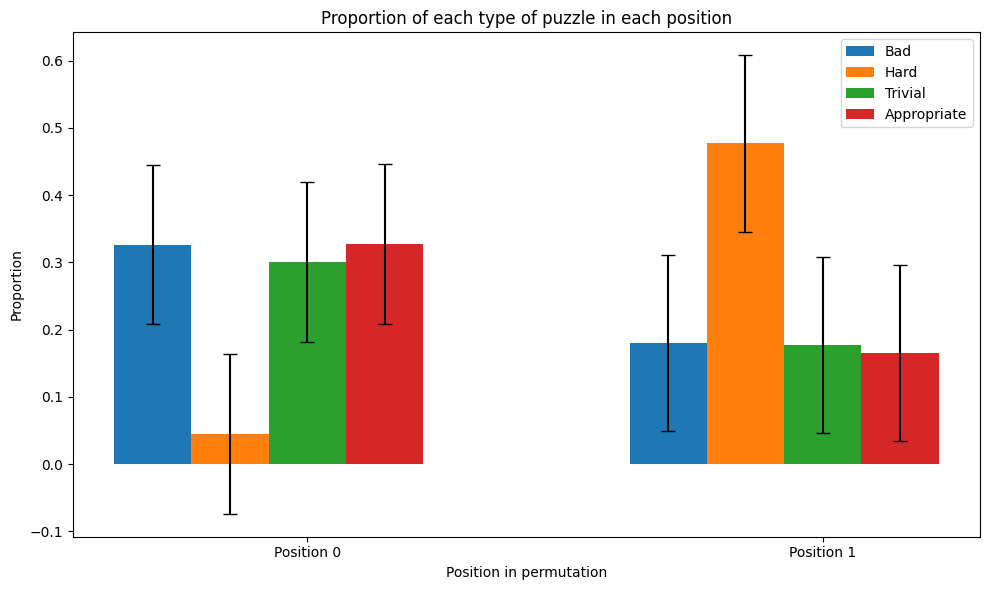

In [88]:
plot_permutations_pref(
    [r[1] for r in res['list_outputs']],
    [r[1] for r in res['permutations']],
    res['puz_ids'],
    title='Proportion of each type of puzzle in each position',
)

In [89]:
# are there any biases in absolute order?
# Thank mr chatgpt
def plot_permutations(perms, n=2, title=None):
    if title is None:
        title = 'Proportion of each index at each position in permutations'
    # Initialize a 2D list to hold frequency counts for each index at each position
    # 5 positions, with 5 possible indices at each position
    freq_counts = np.zeros((n, n))

    # Iterate over each permutation
    for perm in perms:
        for pos, index in enumerate(perm):
            # Increment the count for the index at the current position
            freq_counts[pos, index] += 1

    # Normalize the counts to get proportions
    freq_counts /= len(perms)
    std_devs = np.std(freq_counts, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = np.arange(n)  # Positions in the permutation
    bar_width = 0.15  # Width of the bars

    # Plot a bar for each index at each position
    for i in range(n):
        ax.bar(positions + i * bar_width, freq_counts[:, i], width=bar_width, label=f'Index {i}',
           yerr=std_devs, capsize=5)

    # Formatting the plot
    ax.set_xlabel('Position in permutation')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(positions + bar_width * 2)
    ax.set_xticklabels([f'Position {i}' for i in range(n)])
    ax.legend()

    plt.tight_layout()
    plt.show()

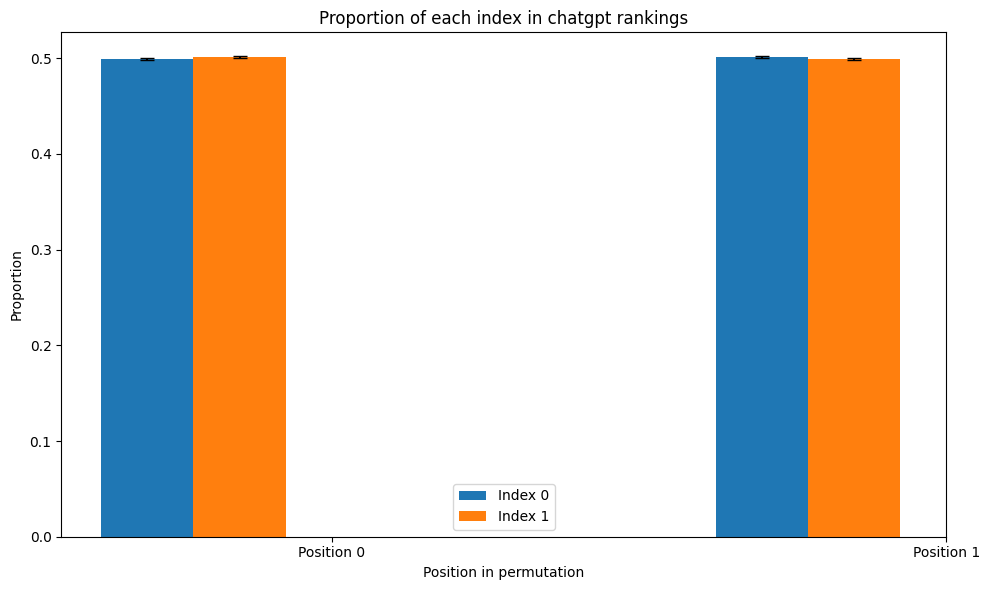

In [90]:
plot_permutations(
    [r[1] for r in res['permutations']],
    title='Proportion of each index in chatgpt rankings'
)

In [91]:
# get matches between puzzles
# first get the absolute rankings
actual_prefs_list = []
for perm, pid, result in zip(
        [r[1] for r in res['permutations']],
        res['puz_ids'],
        [r[1] for r in res['list_outputs']]):
    prefs_permuted = apply_permutation(perm, result)
    actual_prefs = apply_permutation(pid, prefs_permuted)
    actual_prefs_list.append(actual_prefs)

In [92]:
actual_prefs_list

[[5, 1],
 [3, 7],
 [2, 6],
 [7, 0],
 [2, 0],
 [7, 0],
 [4, 7],
 [4, 2],
 [1, 0],
 [5, 2],
 [2, 0],
 [4, 1],
 [7, 0],
 [2, 1],
 [6, 7],
 [2, 4],
 [7, 6],
 [6, 2],
 [1, 0],
 [4, 5],
 [7, 0],
 [4, 1],
 [1, 7],
 [3, 5],
 [2, 0],
 [2, 1],
 [6, 7],
 [7, 3],
 [2, 1],
 [2, 1],
 [3, 0],
 [2, 5],
 [2, 6],
 [3, 0],
 [2, 7],
 [5, 4],
 [3, 0],
 [4, 2],
 [6, 3],
 [7, 0],
 [7, 1],
 [5, 0],
 [6, 7],
 [3, 5],
 [7, 0],
 [6, 7],
 [5, 1],
 [6, 1],
 [7, 2],
 [4, 1],
 [4, 1],
 [5, 1],
 [6, 5],
 [5, 6],
 [5, 4],
 [1, 0],
 [4, 2],
 [6, 0],
 [6, 1],
 [3, 7],
 [5, 7],
 [4, 0],
 [7, 5],
 [5, 0],
 [6, 1],
 [5, 6],
 [7, 0],
 [5, 2],
 [6, 4],
 [3, 5],
 [7, 3],
 [1, 0],
 [7, 1],
 [4, 3],
 [5, 4],
 [3, 7],
 [2, 1],
 [4, 2],
 [7, 3],
 [3, 2],
 [5, 1],
 [5, 7],
 [5, 2],
 [5, 1],
 [6, 2],
 [2, 4],
 [3, 0],
 [5, 3],
 [2, 1],
 [5, 2],
 [4, 1],
 [3, 2],
 [4, 2],
 [3, 5],
 [7, 1],
 [4, 0],
 [2, 7],
 [4, 1],
 [7, 0],
 [5, 0],
 [1, 4],
 [2, 0],
 [7, 1],
 [2, 1],
 [4, 5],
 [7, 0],
 [7, 0],
 [3, 1],
 [5, 1],
 [2, 0],
 [2, 4],
 

In [93]:
matchups = defaultdict(list)
for match in actual_prefs_list:
    matchup = sorted(match)
    matchups[tuple(matchup)].append(int(matchup == match))

winrates = {}
for matchup, games in matchups.items():
    winrates[matchup] = sum(games) / len(games)

In [94]:
winrates

{(1, 5): 0.0,
 (3, 7): 0.5405405405405406,
 (2, 6): 0.3103448275862069,
 (0, 7): 0.0,
 (0, 2): 0.0,
 (4, 7): 0.6451612903225806,
 (2, 4): 0.6060606060606061,
 (0, 1): 0.15384615384615385,
 (2, 5): 0.47058823529411764,
 (1, 4): 0.07142857142857142,
 (1, 2): 0.0,
 (6, 7): 0.9444444444444444,
 (4, 5): 0.5357142857142857,
 (1, 7): 0.03225806451612903,
 (3, 5): 0.48484848484848486,
 (0, 3): 0.0,
 (2, 7): 0.6764705882352942,
 (3, 6): 0.2777777777777778,
 (0, 5): 0.0,
 (1, 6): 0.0,
 (5, 6): 0.3333333333333333,
 (0, 6): 0.0,
 (5, 7): 0.6944444444444444,
 (0, 4): 0.0,
 (4, 6): 0.25,
 (3, 4): 0.5405405405405406,
 (2, 3): 0.15384615384615385,
 (1, 3): 0.046511627906976744}

Text(0.5, 1.0, 'Distribution of winrates in matches between puzzles')

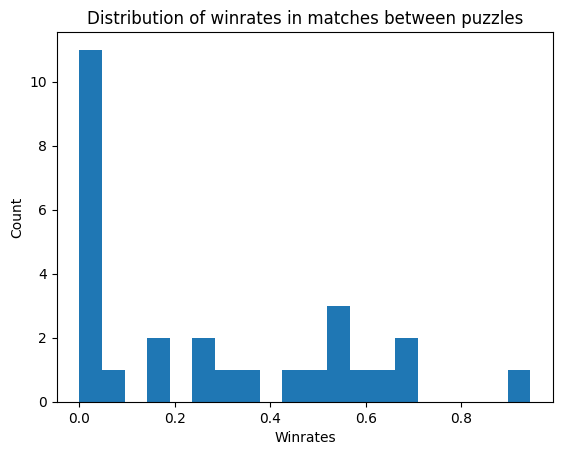

In [95]:
plt.hist(winrates.values(), bins=20)
plt.xlabel('Winrates')
plt.ylabel('Count')
plt.title('Distribution of winrates in matches between puzzles')

In [96]:
for matchup, winrate in winrates.items():
    if 0 in matchup or 1 in matchup:
        print(f'{matchup}: {winrate}')

(1, 5): 0.0
(0, 7): 0.0
(0, 2): 0.0
(0, 1): 0.15384615384615385
(1, 4): 0.07142857142857142
(1, 2): 0.0
(1, 7): 0.03225806451612903
(0, 3): 0.0
(0, 5): 0.0
(1, 6): 0.0
(0, 6): 0.0
(0, 4): 0.0
(1, 3): 0.046511627906976744


In [97]:
for matchup, winrate in winrates.items():
    if 5 in matchup or 4 in matchup:
        if matchup[0] != 4:
            matchup = matchup[::-1]
            winrate = 1 - winrate
        elif matchup[0] != 5:
            matchup = matchup[::-1]
            winrate = 1 - winrate
        print(f'{matchup}: {winrate}')

(5, 1): 1.0
(7, 4): 0.3548387096774194
(4, 2): 0.3939393939393939
(5, 2): 0.5294117647058824
(4, 1): 0.9285714285714286
(5, 4): 0.4642857142857143
(5, 3): 0.5151515151515151
(5, 0): 1.0
(6, 5): 0.6666666666666667
(7, 5): 0.3055555555555556
(4, 0): 1.0
(6, 4): 0.75
(4, 3): 0.45945945945945943


In [98]:
(0, 1)[::-1]

(1, 0)

In [99]:
winrates[(5, 6)]

0.3333333333333333

In [100]:
winrates[(5, 7)]

0.6944444444444444

In [101]:
winrates[(4, 6)]

0.25

In [102]:
winrates[(4, 7)]

0.6451612903225806

In [103]:
for matchup, winrate in winrates.items():
    if 3 in matchup:
        print(f'{matchup}: {winrate}')

(3, 7): 0.5405405405405406
(3, 5): 0.48484848484848486
(0, 3): 0.0
(3, 6): 0.2777777777777778
(3, 4): 0.5405405405405406
(2, 3): 0.15384615384615385
(1, 3): 0.046511627906976744
